## MultiLayer Neural Network XOR Logic Code from Scratch

In [ ]:
from IPython import display
display.Image("XOR_table.jpg")

: 

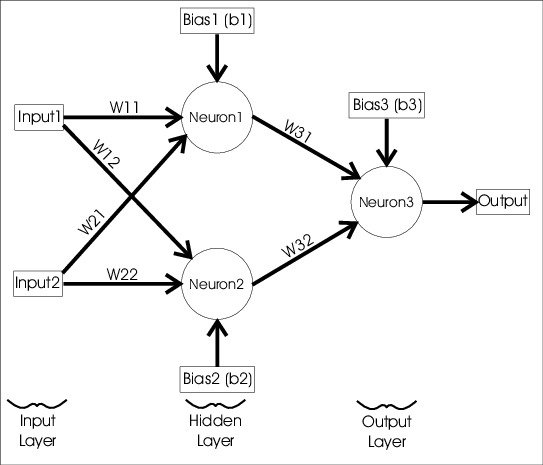

In [2]:
display.Image("XOR_network.jpg")

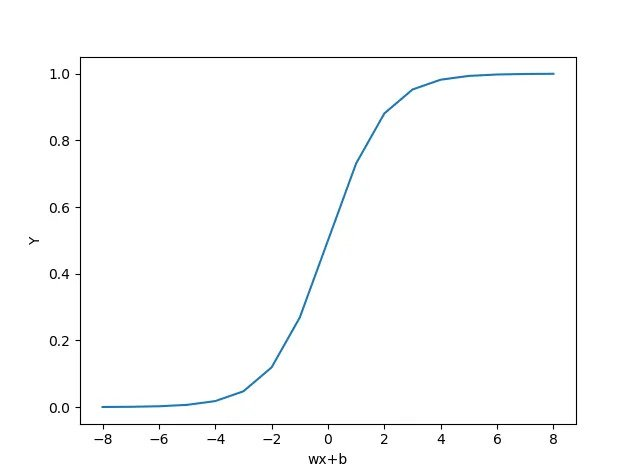

In [3]:
display.Image("Sigmoid.jpg")

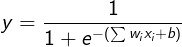

In [4]:
display.Image("Sigmoid_function.jpg")

#### Gradient Descent
The loss function of the sigmoid neuron is the squared error loss. If we plot the loss/error against the weights we get something like this:

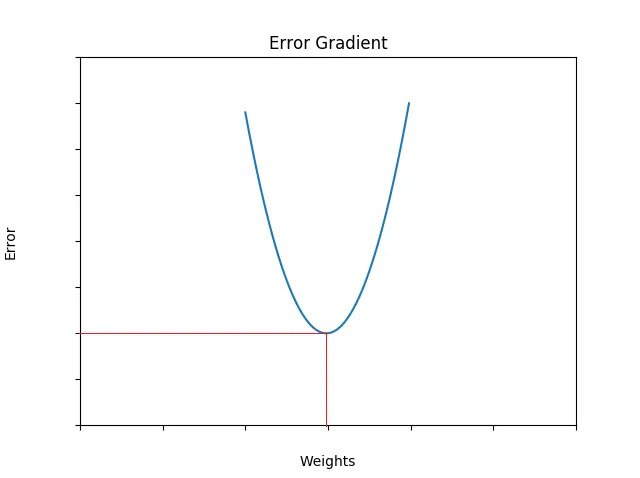

In [5]:
display.Image("Gradient.jpg")

#### Math Behind Gradient Descent

Error = (t - y) where t is the expected output and y is the predicted output

Squared Error = 1/2 (t - y)**2

After a bunch of calculus...

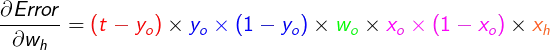

#### THE LEARNING ALGORITHM

1. Initialize the weights and biases randomly. <br>
2. Iterate over the data <br>
   i. Compute the predicted output using the sigmoid function <br>
   ii. Compute the loss using the square error loss function <br>
   iii. W(new) = W(old) — α ∆W <br>
   iv. B(new) = B(old) — α ∆B <br>
3. Repeat until the error is minimal <br>

In [4]:
import numpy as np 
#np.random.seed(0)

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

DEBUG = False          #don't forget to comment out the input below if DEBUG=False

def log(s):
    if DEBUG:
        print(s)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 1000000
lr = 0.1
losses = []

inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))


print("Input: ",end='')
print(*inputs)
print("Initial hidden weights: ",end='')
print(*hidden_weights)
print("Initial hidden biases: ",end='')
print(*hidden_bias)
print("Initial output weights: ",end='')
print(*output_weights)
print("Initial output biases: ",end='')
print(*output_bias)


#Training algorithm
for _ in range(epochs):
    
    #Forward Propagation
    
    log("")
    log("FOR EXTRA CREDIT, PlEASE EXPLAIN EACH OF THE MATRICES LOGGED BELOW")
    log("DURING THE FIRST EPOCH. TO DEMONSTRATE WHAT I MEAN BY EXPLANATION, I")
    log("WILL EXPLAIN THE FIRST MATRIX IN CLASS")
    log("")
    
    log("")
    log("FORWARD PROPAGATION")
    log("")
    
    hidden_layer_activation = np.dot(inputs,hidden_weights)
    log("1. xw:")
    log(hidden_layer_activation)
    log("")
    
    hidden_layer_activation += hidden_bias
    log("2. xw+b:")
    log(hidden_layer_activation)
    log("")

    hidden_layer_output = sigmoid(hidden_layer_activation)   
    log("3. sigmoid(xw+b):")
    log(hidden_layer_output)
    log("")
    
    output_layer_activation = np.dot(hidden_layer_output,output_weights)
    log("4. (xw+b)w:")
    log(output_layer_activation)
    log("")
    
    output_layer_activation += output_bias
    log("5. ((xw+b)w)+b:")
    log(output_layer_activation)
    log("")
    
    predicted_output = sigmoid(output_layer_activation)
    log("6. sigmoid(((sigmoid(xw+b))w)+b:):")
    log(predicted_output)
    log("")
    
    log("")
    log("BACK PROPAGATION")
    log("")

    #Backpropagation
    #The ultimate goal of backpropagation is to find the change in the error with respect to the 
    #weights in the network. If we’re looking for the change of one value with respect to another,
    #that’s a derivative.
    
    loss = 0.5 * (expected_output - predicted_output) ** 2
    log("7. Loss:")
    log(loss)
    log("")
    losses.append(np.sum(loss))

    error = expected_output - predicted_output  # (t-yo)
    log("8. (t-yo)")
    log(error)
    log("")
    
    d_predicted_output = error * sigmoid_derivative(predicted_output) # (t-yo)*yo(1-yo)
    log("9. (t-yo)*yo(1-yo)")
    log(d_predicted_output)
    log("")
    
    error_hidden_layer = d_predicted_output.dot(output_weights.T) # (t-yo)*yo(1-yo)(wo)
    log("10. (t-yo)*yo(1-yo)(wo)")
    log(error_hidden_layer)
    log("")

    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    # (t-yo)*yo(1-yo)(wo)*xo(1-xo)xh
    log("11. (t-yo)*yo(1-yo)(wo)*xo(1-xo)xh")
    log(d_hidden_layer)
    log("")
    
    log("")
    log("UPDATE WEIGHTS AND BIASES")
    log("")
                           
    #Updating Weights and Biases
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
    log("12. update output weights")
    log(output_weights)
    log("")
    
    output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
    log("13. update output bias")
    log(output_bias)
    log("")
    
    hidden_weights += inputs.T.dot(d_hidden_layer) * lr
    log("14. update hidden weights")
    log(hidden_weights)
    log("")
    
    hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    log("15. update hidden bias")
    log(hidden_bias)
    log("")
    
    # input()

print()
print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*predicted_output)

Input: [0 0] [0 1] [1 0] [1 1]
Initial hidden weights: [0.37185873 0.30180883] [0.17398327 0.53930514]
Initial hidden biases: [0.82171608 0.9835164 ]
Initial output weights: [0.05321716] [0.4847896]
Initial output biases: [0.75358622]

Final hidden weights: [12.47406124 12.56422931] [-3.77054651  5.32375962]
Final hidden bias: [ 2.5708303  -1.12500971]
Final output weights: [-7.60501822] [8.44709484]
Final output bias: [-0.84206566]

Output from neural network after 10,000 epochs: [0.0029103] [0.99672879] [0.49998056] [0.50002676]


Text(0, 0.5, 'Loss value')

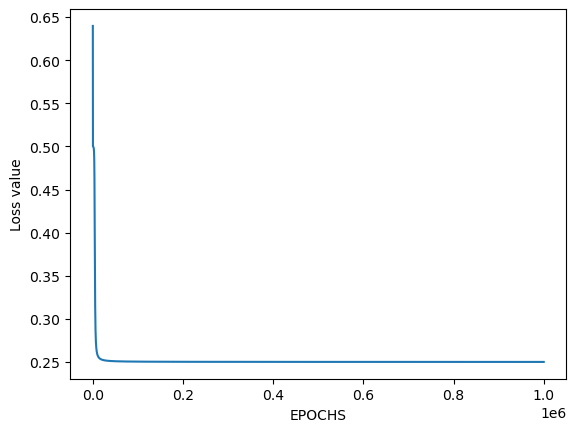

In [5]:
# We plot losses to see how our network is doing
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")

In [ ]:
import numpy as array

step_2 = np.array([[0.00411497, 0.5188456], 
              [0.59182117, 0.69068968], 
              [0.63922712, 0.77427138], 
              [1.22693332, 0.94611547]])

w = np.array([[0.635, 0.255], 
              [0.588, 0.172]])

step_2@w
             